In [ ]:

#mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=80, activation='relu',
#                    solver='sgd', verbose=1, random_state=42,                      #Precisión del modelo: 97.16%
#                    learning_rate_init=0.02, batch_size=100)

#mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=80, activation='relu',
#                    solver='sgd', verbose=1, random_state=42,                       #Precisión del modelo: 96.58%
#                    learning_rate_init=0.01, batch_size=200)

#mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=80, activation='relu',
#                    solver='sgd', verbose=1, random_state=42,                       #Precisión del modelo: 96.86%
#                    learning_rate_init=0.03, batch_size=200)

#mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=600, activation='relu',
#                    solver='sgd', verbose=1, random_state=43,                       #Precisión del modelo: 96.99% pero le pego a todas las imagenes que hice
#                    learning_rate_init=0.001, batch_size=128)

#mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=600, activation='relu',
#                    solver='sgd', verbose=1, random_state=42,                      #Precisión del modelo: 97.15% pero le pego a todas las imagenes que hice
#                    learning_rate_init=0.001, batch_size=128)



# TENES QUE CENTRAR LAS IMAGENES PARA QUE FUNCIONE BIEN PRIORIZA OTRRAS COSAS (estan normalizadas en 20x20 eso ocupan las imagenes y despues se les agrega 4 pixeles en todas las direcciones y llega a 28x28)
#   https://interactivechaos.com/es/manual/tutorial-de-deep-learning/el-dataset-mnist
# Fijate con alguna libreia de pytohn para hacer un display de pantalla para que escriba alguien lo numeros en vez de hacerlo en paint
# Cuales son los requisitos para que detecte bien la imagen?


# INTENTAR HACER QUE CALCULE EN TIEMPO REAL QUE NUMERO ES UNA ONDA ASI:

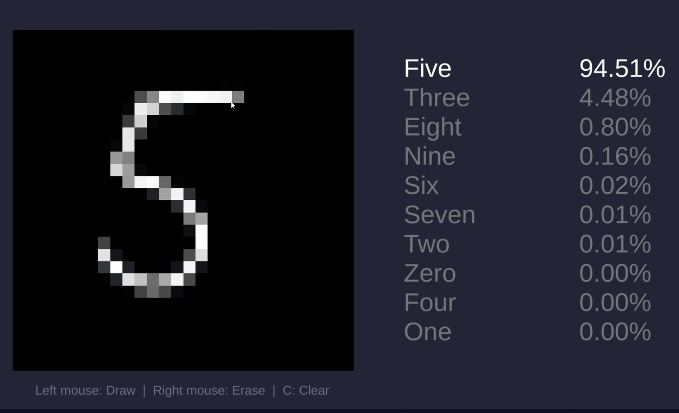

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('DATA/train.csv')

X, Y = data.iloc[:, 1:].values, data.iloc[:, 0].values
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=600, activation='relu',
                    solver='sgd', verbose=1, random_state=42,
                    learning_rate_init=0.001, batch_size=128)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Iteration 1, loss = 1.76826214
Iteration 2, loss = 0.84457665
Iteration 3, loss = 0.56282424
Iteration 4, loss = 0.46147574
Iteration 5, loss = 0.40829075
Iteration 6, loss = 0.37475040
Iteration 7, loss = 0.35068872
Iteration 8, loss = 0.33217779
Iteration 9, loss = 0.31697176
Iteration 10, loss = 0.30430830
Iteration 11, loss = 0.29285762
Iteration 12, loss = 0.28343386
Iteration 13, loss = 0.27439511
Iteration 14, loss = 0.26608249
Iteration 15, loss = 0.25875266
Iteration 16, loss = 0.25162493
Iteration 17, loss = 0.24546437
Iteration 18, loss = 0.23932017
Iteration 19, loss = 0.23358365
Iteration 20, loss = 0.22787553
Iteration 21, loss = 0.22263344
Iteration 22, loss = 0.21790300
Iteration 23, loss = 0.21269094
Iteration 24, loss = 0.20828689
Iteration 25, loss = 0.20424942
Iteration 26, loss = 0.19976015
Iteration 27, loss = 0.19590877
Iteration 28, loss = 0.19176315
Iteration 29, loss = 0.18764533
Iteration 30, loss = 0.18445766
Iteration 31, loss = 0.18057941
Iteration 32, los

The image is probably a: [0]


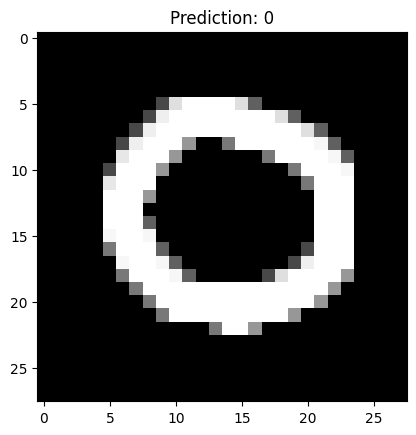

The image is probably a: [1]


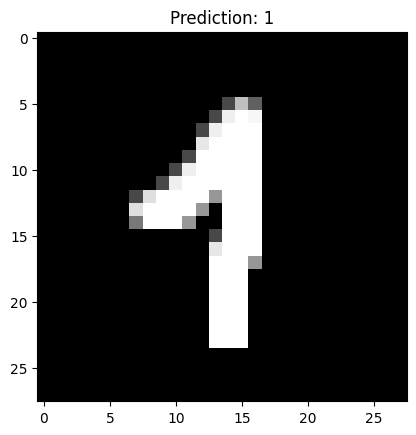

The image is probably a: [2]


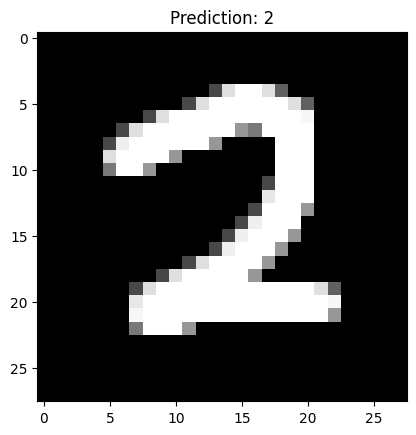

The image is probably a: [3]


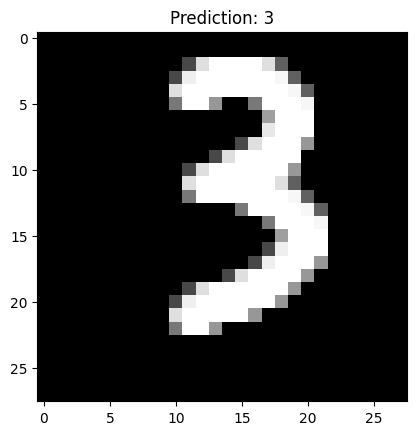

The image is probably a: [4]


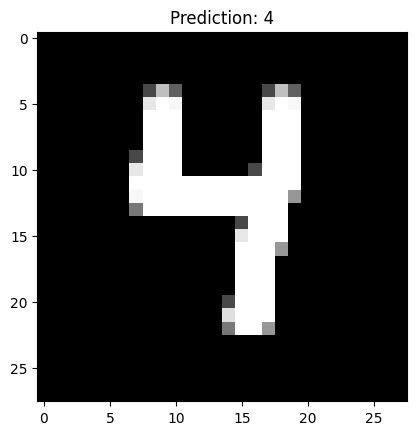

The image is probably a: [5]


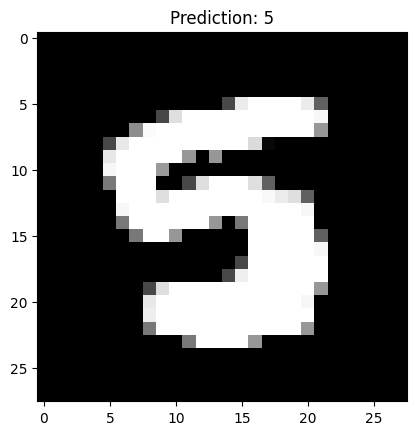

The image is probably a: [6]


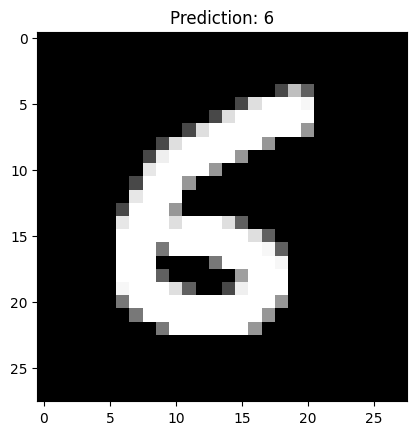

The image is probably a: [7]


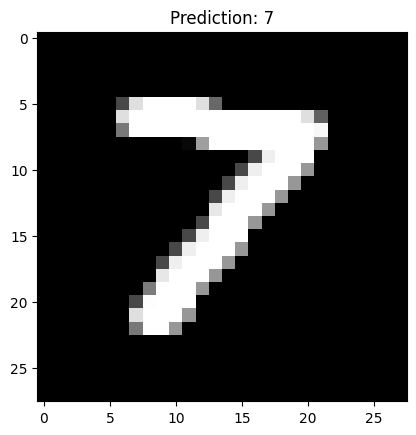

The image is probably a: [8]


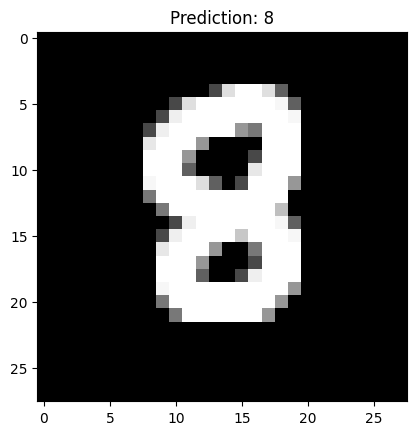

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para preprocesar una imagen (28x28 píxeles, escala de grises)
def preprocesar_imagen(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Cargar la imagen en escala de grises, saca los rdb si tiene
    img_resized = cv2.resize(img, (28, 28))  # redimenciono 28x28
    img_resized = img_resized / 255.0  # Normalizo de 0-1
    img_resized = img_resized.flatten()  # Aplanar la imagen a un vector de 784 elementos
    return img_resized

for i in range(9):
    path_imagen = f'digits/digitB{i}.png'
    imagen_procesada = preprocesar_imagen(path_imagen)

    imagen_procesada = imagen_procesada.reshape(1, -1)  # Lo cambio de (784,) a (1, 784) que es la forma correcta

    prediccion = mlp.predict(imagen_procesada)
    print(f'The image is probably a: {prediccion}')

    # La vuelvo a poner en 28x28 para que el humano vea como lo "ve" la maquina
    plt.imshow(imagen_procesada.reshape(28, 28), cmap='gray')
    plt.title(f'Prediction: {prediccion[0]}')
    plt.show()


Draw a number and press 'Enter' to predict it.
The image is probably a: 8


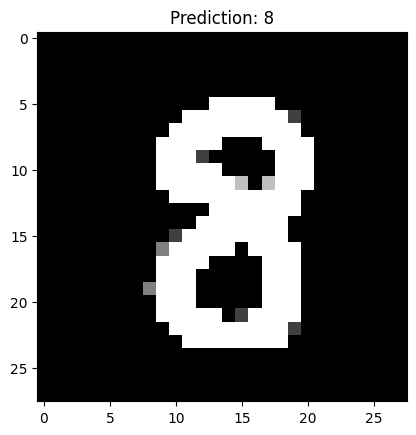

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Crear una ventana para dibujar
drawing = False  # Controla el estado de dibujo
last_point = None  # Guarda el último punto donde se dibujó

def mouse_callback(event, x, y, flags, param):
    global drawing, last_point
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        last_point = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.line(canvas, last_point, (x, y), (255, 255, 255), 30)  # Dibuja con un grosor de 30 todo blanco
            last_point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        last_point = None

# Crear una imagen en negro de 200x200 píxeles
canvas = np.zeros((200, 200), dtype=np.uint8) # uint8 es de 0 a 255 (1 byte)

# Crear una ventana y registrar el callback del mouse
cv2.namedWindow("ventana") # defino la ventana
cv2.setMouseCallback("ventana", mouse_callback) # asocio la ventana con la funcion

print("Draw a number and press 'Enter' to predict it.")

while True:
    cv2.imshow("ventana", canvas) # muestro la ventana
    key = cv2.waitKey(1) & 0xFF # verifica si en ese 1 milisegundo presionaste una tecla, y obtiene su código entre 0 y 255 por eso el FF.
    if key == 13:  # Enter key
        break
    elif key == 27:  # Esc key
        canvas.fill(0)  # Limpiar el lienzo

cv2.destroyAllWindows()

# Preprocesar la imagen dibujada
def preprocesar_imagen(img):
    # Redimensionar la imagen a 20x20 
    img_resized = cv2.resize(img, (20, 20))
    
    # Crear un nuevo lienzo de 28x28 píxeles
    img_with_border = np.zeros((28, 28), dtype=np.uint8)
    
    # Pngo la imagen redimensionada en el centro de la nueva imagen
    img_with_border[4:24, 4:24] = img_resized 
    
    img_with_border = img_with_border / 255.0  # Normalizar de 0-1
    img_with_border = img_with_border.flatten()  # Aplanar la imagen a un vector de 784 elementos
    return img_with_border

# Procesar la imagen dibujada
imagen_procesada = preprocesar_imagen(canvas)
imagen_procesada = imagen_procesada.reshape(1, -1)  # Cambiar a la forma correcta (1, 784)

prediccion = mlp.predict(imagen_procesada)

print(f"The image is probably a: {prediccion[0]}")

# Mostrar la imagen
plt.imshow(imagen_procesada.reshape(28, 28), cmap="gray")
plt.title(f"Prediction: {prediccion[0]}")
plt.show()